<a href="https://colab.research.google.com/github/kartk/ML/blob/main/perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class Perceptron:
  def __init__(self, k:int, m:int, epsilon:float, mean:float=0.0, variance:float=1.0)->None:
    self.k = k 
    self.m = m
    self.mean = mean;
    self.variance = variance;
    self.data = self.datagenerator(k, m, epsilon, mean, variance);

    self.W = None
    self.b = None


  def datagenerator(self, k:int, m:int, epsilon:float, mean:float, variance:float)->np.array:
    data = []
    i = 0

    # print(f"mean {mean}; variance {variance}")
    while i < m :
      temp = np.random.normal(mean, math.sqrt(variance), k)
      temp = temp / np.linalg.norm(temp)
      if np.absolute(temp[-1]) >= epsilon:
        i+=1
        if (temp[-1] >= epsilon):
          temp = np.append(temp, 1)
        else :
          temp = np.append(temp, -1)
        data.append(temp)
    return np.array(data)
  
  def PLA(self):
    self.W = np.zeros(self.k)
    self.b = 0
    count = 0
    while (True):
      count += 1
      preds = np.array([1 if pred >=0 else -1 for pred in np.dot(self.W, self.data[:,:-1].T) + self.b])
      misclassified_indices = np.where(preds != self.data[:,-1])[0]
      
      if self.k == 2:
        # Visualization of Hyperplane when feature size is 2. Code taken from :
        # https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38
        x_intercept = 0 if self.W[0] == 0 else -self.b /self.W[0]
        y_intercept = 0 if self.W[1] == 0 else self.b /self.W[1]
        slope = 0 if x_intercept==0 else y_intercept/x_intercept
        x = np.arange(-1,1, 0.1)
        y = np.array([slope * a+ y_intercept for a in x])
        sns.set_theme(style="darkgrid")
        sns.scatterplot(x=p.data[:,0], y=p.data[:,1], hue = preds)
        sns.lineplot(x=x, y=y)
        plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=1)
        plt.show()

      if len(misclassified_indices) == 0:
        # print("Done building model!")
        return count
      for index in misclassified_indices:
        self.W += self.data[index, -1] * self.data[index, :-1]
        self.b += self.data[index, -1] 


In [ ]:
p = Perceptron(2, 10, 0.1)

mean 0.0; variance 1.0


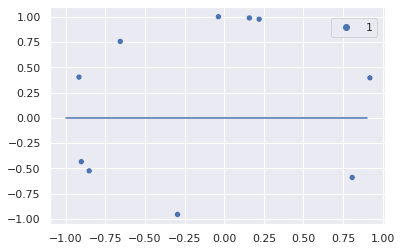

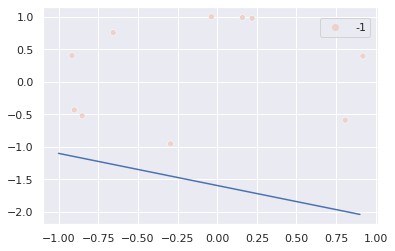

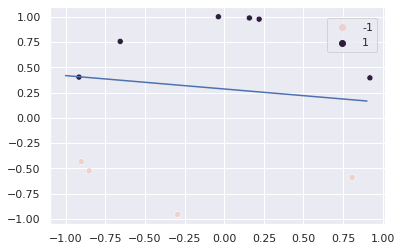

Done building model!


3

In [ ]:
p.PLA()

In [ ]:
preds = np.array([1 if pred >=0 else -1 for pred in np.dot(p.W, p.data[:,:-1].T) + p.b])

In [ ]:

preds

array([-1, -1,  1, -1, -1, -1, -1, -1, -1,  1])

In [ ]:
p.data[:,-1]

array([-1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.])

In [ ]:
np.dot(np.array([[1,2],[1,2]]) ,np.array([[2],[2]]))

array([[6],
       [6]])

1) For k = 5,  = 0.1, for a range of possible m values, repeatedly generate data sets of size m and fit a perceptron
to them. Plot, as a function of m, the average number of steps needed for the Perceptron Learning Algorithm
to converge. Do your results make sense? Do you think looking at larger and larger m values outside the range
you plot will produce anything different?

In [ ]:
p =Perceptron(10, 1000, 0.1)
p.PLA()

mean 0.0; variance 1.0
Done building model!


3

In [ ]:
m_range = np.arange(100, 10000, 100)
steps_convergence = []
for m in m_range:
  steps_inner = np.array([])
  for i in range(25):
    p = Perceptron(k=5, m=m, epsilon=0.1)
    steps_inner = np.append(steps_inner, p.PLA())
  steps_convergence.append(np.average(steps_inner))

In [ ]:
steps_convergence

[4.68,
 4.56,
 4.32,
 4.2,
 4.12,
 4.36,
 4.0,
 4.16,
 4.04,
 3.88,
 4.12,
 3.72,
 3.52,
 3.36,
 3.6,
 3.4,
 4.36,
 3.64,
 3.92,
 3.6,
 3.24,
 3.56,
 4.08,
 3.28,
 3.28,
 3.52,
 3.4,
 3.24,
 3.6,
 3.2,
 3.36,
 3.04,
 3.04,
 3.04,
 3.08,
 3.4,
 3.12,
 3.4,
 3.12,
 3.0,
 3.08,
 3.0,
 3.24,
 3.4,
 3.04,
 3.0,
 3.0,
 3.0,
 3.12,
 3.0,
 3.0,
 3.0,
 3.32,
 3.2,
 3.08,
 3.0,
 3.0,
 3.2,
 3.0,
 3.0,
 3.12,
 3.0,
 3.0,
 3.0,
 3.0,
 3.68,
 3.0,
 3.0,
 3.4,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0]

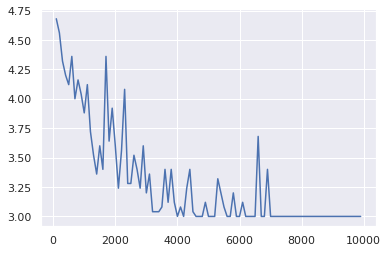

In [ ]:
plt.plot(m_range, steps_convergence)

In [ ]:
p.data.shape

(9500, 51)

In [ ]:
k_range = np.arange(5, 200, 5)
steps_convergence = []
for k in k_range:
  steps_inner = np.array([])
  for i in range(100):
    p = Perceptron(k=k, m=100, epsilon=0.05)
    steps_inner = np.append(steps_inner, p.PLA())
  steps_convergence.append(np.average(steps_inner))

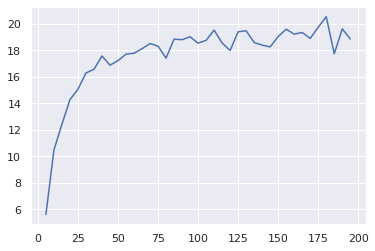

In [ ]:
plt.plot(k_range, steps_convergence)

In [ ]:
eps_range = np.arange(0, 1, 0.1)
steps_convergence = []
for eps in eps_range:
  steps_inner = np.array([])
  for i in range(100):
    p = Perceptron(k=5, m=100, epsilon=eps)
    steps_inner = np.append(steps_inner, p.PLA())
  steps_convergence.append(np.average(steps_inner))

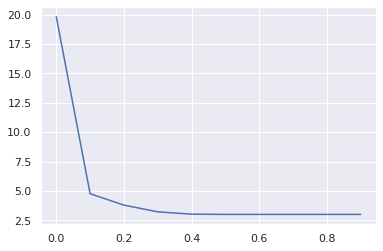

In [ ]:
plt.plot(eps_range, steps_convergence)